This code takes all combinations of mass (M), inclination (i) and distance (D) in a predetermined grid and then sorts these combinations by the normalization they produce given a non-relativistic model. This sorting of MiD values is expected to increase the efficiency of the fitting script. The sorted list is split in the middle and saved as two lists; one going from middle to the start and the other going from middle to the end. Our fitting script which fits the relativistic model we use for spin calculation can then move through these two lists in order. We will start in the middle of the sorted list so that we do not start at an extreme and introduce errors.

In [1]:
import numpy as np
from math import cos
import itertools
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Generate the M, i, D, ranges
Mass = np.linspace(8.0,19.0,12)
inc = np.linspace(42.0,69.5,12)
Dist = np.linspace(6.0,12.5,14)

In [3]:
# Calculate normalization
MiD = list(itertools.product(Mass, inc, Dist))

f = 1.7 # Color correction factor
norm = []
for item in MiD:
    norm.append((item[0] / item[2])**2 * ( cos(item[1])/f**4 ))
            

In [4]:
# Sort MiD list according to normalization
sorted_norm = [x for x,y in sorted(zip(norm, MiD))]
sorted_MiD = [y for x,y in sorted(zip(norm, MiD))]

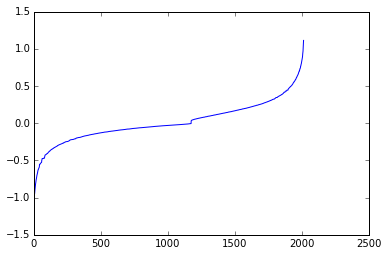

In [5]:
plt.plot(sorted_norm)
plt.show()

In [6]:
# Make two lists from middle to smallest and middle to largest

first_half = sorted_MiD[:1008]
second_half = sorted_MiD[1008:]

MiD_mid_to_small = list(reversed(first_half))
MiD_mid_to_large = second_half

In [7]:
with open('MiD_mid_to_small.dat', 'w') as f:
    for s in MiD_mid_to_small:
        line = str(s[0]) + " " + str(s[1]) + " " + str(s[2])
        f.write(line + '\n')
        
with open('MiD_mid_to_large.dat', 'w') as f:
    for s in MiD_mid_to_large:
        line = str(s[0]) + " " + str(s[1]) + " " + str(s[2])
        f.write(line + '\n')